In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() 

In [7]:

salaries_df = pd.read_csv('ds_salaries.csv')
salaries_df.head(609)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [8]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [47]:
salaries_df.describe().T.style.background_gradient(cmap = "BuGn")

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.000000,303.000000,175.370085,0.000000,151.500000,303.000000,454.500000,606.000000
work_year,607.000000,2021.405272,0.692133,2020.000000,2021.000000,2022.000000,2022.000000,2022.000000
salary,607.000000,324000.062603,1544357.486636,4000.000000,70000.000000,115000.000000,165000.000000,30400000.000000
salary_in_usd,607.000000,112297.869852,70957.259411,2859.000000,62726.000000,101570.000000,150000.000000,600000.000000
remote_ratio,607.000000,70.922570,40.709130,0.000000,50.000000,100.000000,100.000000,100.000000


In [10]:
salaries_df['work_year'].mean()

2021.4052718286655

In [11]:
salaries_df['salary'].mean()

324000.0626029654

In [12]:
salaries_df['salary_in_usd'].mean()

112297.86985172982

In [13]:
salaries_df['remote_ratio'].mean()

70.92257001647447

In [14]:
salaries_df['work_year'].var()

0.47904806955160084

In [15]:
salaries_df['salary'].var()

2385040046528.2056

In [16]:
salaries_df['salary_in_usd'].var()

5034932663.176105

In [17]:
salaries_df['remote_ratio'].var()

1657.233268631653

In [18]:
salaries_df['work_year'].std()

0.6921329854526519

In [19]:
salaries_df['salary'].std()

1544357.486635852

In [20]:
salaries_df['salary_in_usd'].std()

70957.2594113957

In [21]:
salaries_df['remote_ratio'].std()

40.70913004022135

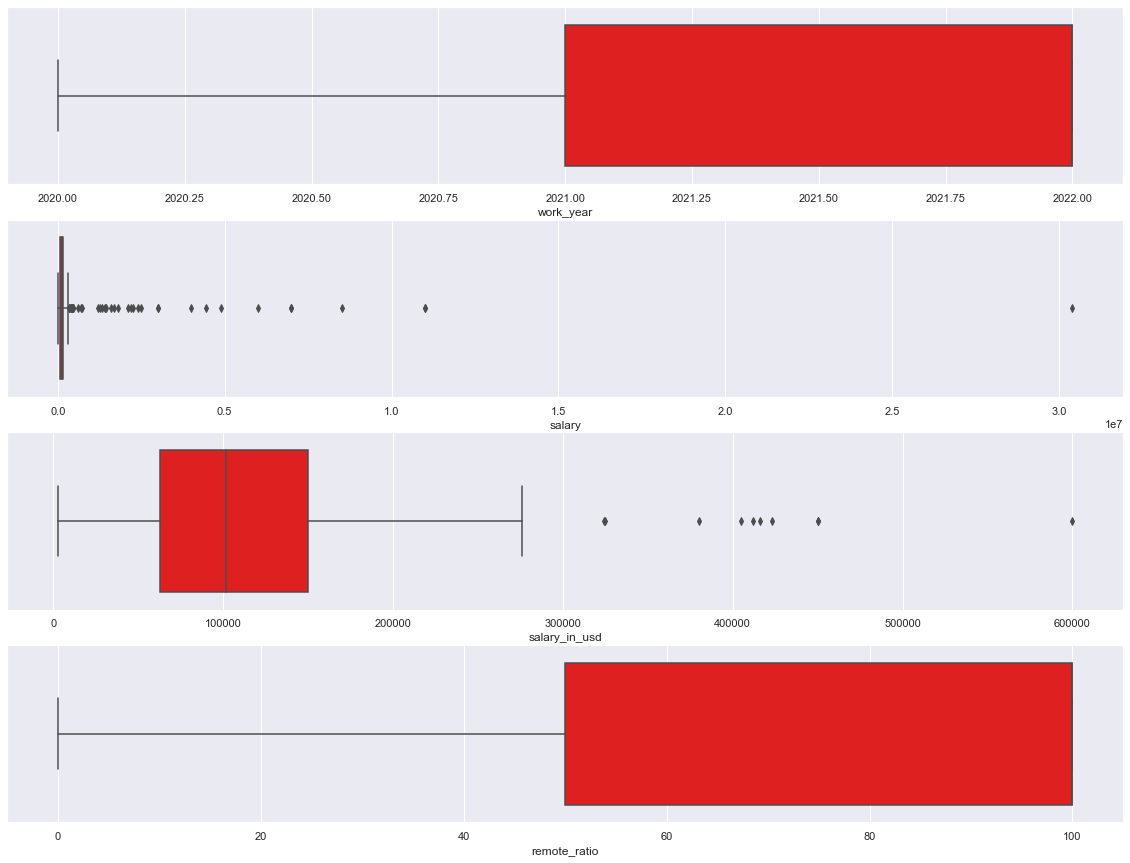

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
sns.boxplot(x=salaries_df.work_year,color='red')
plt.subplot(4,1,2)
sns.boxplot(x=salaries_df.salary,color='red')
plt.subplot(4,1,3)
sns.boxplot(x=salaries_df.salary_in_usd,color='red')
plt.subplot(4,1,4)
sns.boxplot(x=salaries_df.remote_ratio,color='red')
plt.show()

in the first plot because of the panadmic of covid 19 from year 2020 till year 2021 there's no work
but work take place from 2021 till 2022 
in the 2nd plot the amount of workers that get paied high salaries are so low but on the other hand the workers that have low salaries are the most
in the 3rd plot the salary in usd are the most at 100,000 but on the other hand its so low from 300,000 to 450,000
in the 4th plot the remote ratio is max


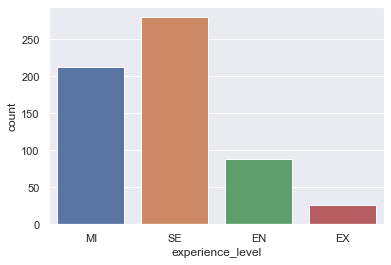

In [23]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="experience_level", data=salaries_df)

Experience level it's count
MI is 210
SE the highest by 285
EN is 90
EX is 25


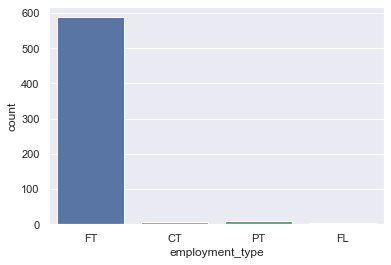

In [24]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="employment_type", data=salaries_df)

Employment type it's count
FT is the highest by 595


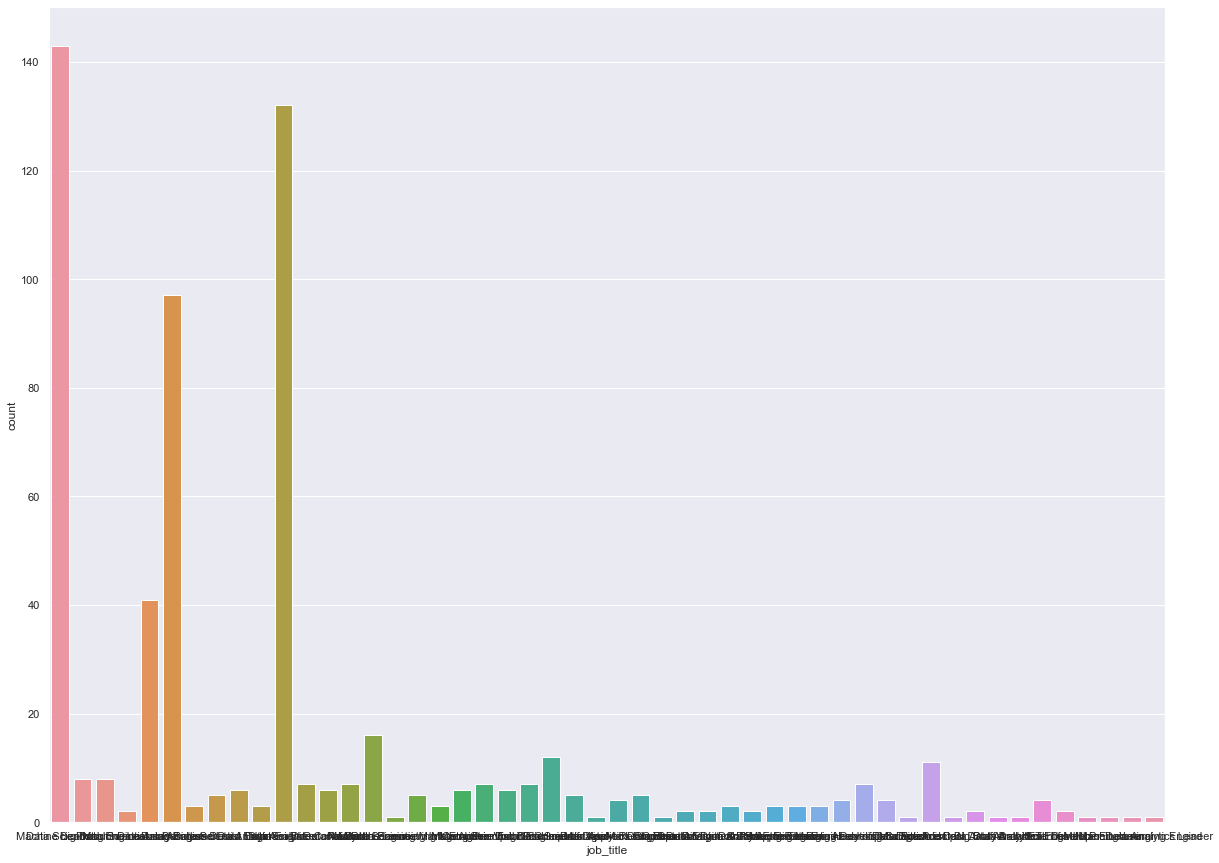

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt 
plt.figure(figsize=(20,15))

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="job_title", data=salaries_df)


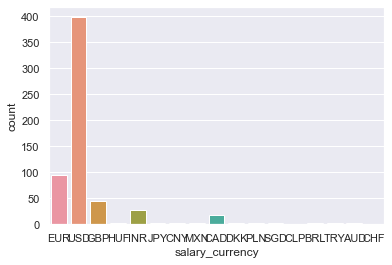

In [26]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="salary_currency", data=salaries_df)

the highest currency is the usd with 400 count

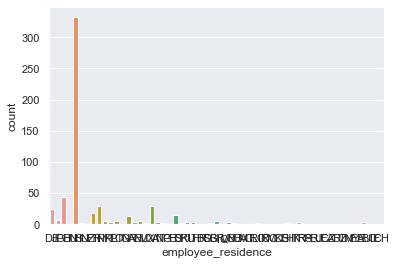

In [27]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="employee_residence", data=salaries_df)

the highest in employee residence is HN with 340

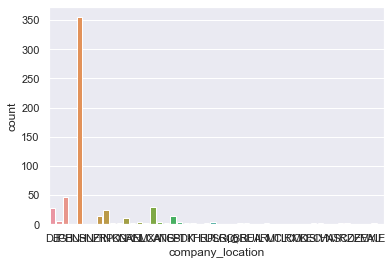

In [28]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="company_location", data=salaries_df)

the highest company location is HN with 355

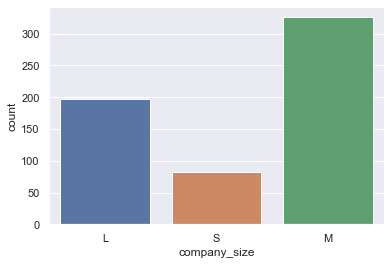

In [29]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="company_size", data=salaries_df)

the highest company size is medium with 340

In [30]:
print(salaries_df['experience_level'].unique())
print(salaries_df['experience_level'].nunique())

['MI' 'SE' 'EN' 'EX']
4


In [31]:
print(salaries_df['employment_type'].unique())
print(salaries_df['employment_type'].nunique())

['FT' 'CT' 'PT' 'FL']
4


In [32]:
print(salaries_df['job_title'].unique())
print(salaries_df['job_title'].nunique())

['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data Anal

In [33]:
print(salaries_df['salary_currency'].unique())
print(salaries_df['salary_currency'].nunique())


['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']
17


In [34]:
print(salaries_df['employee_residence'].unique())
print(salaries_df['employee_residence'].nunique())

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']
57


In [35]:
print(salaries_df['company_location'].unique())
print(salaries_df['company_location'].nunique())

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']
50


In [36]:
print(salaries_df['company_size'].unique())
print(salaries_df['company_size'].nunique())

['L' 'S' 'M']
3


In [37]:
salaries_df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [38]:
salaries_df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [39]:
salaries_df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [40]:
salaries_df['salary_currency'].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

In [41]:
salaries_df['employee_residence'].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [42]:
salaries_df['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [43]:
salaries_df['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [44]:
salaries_df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [45]:
salaries_df.isna().sum().sum()

0

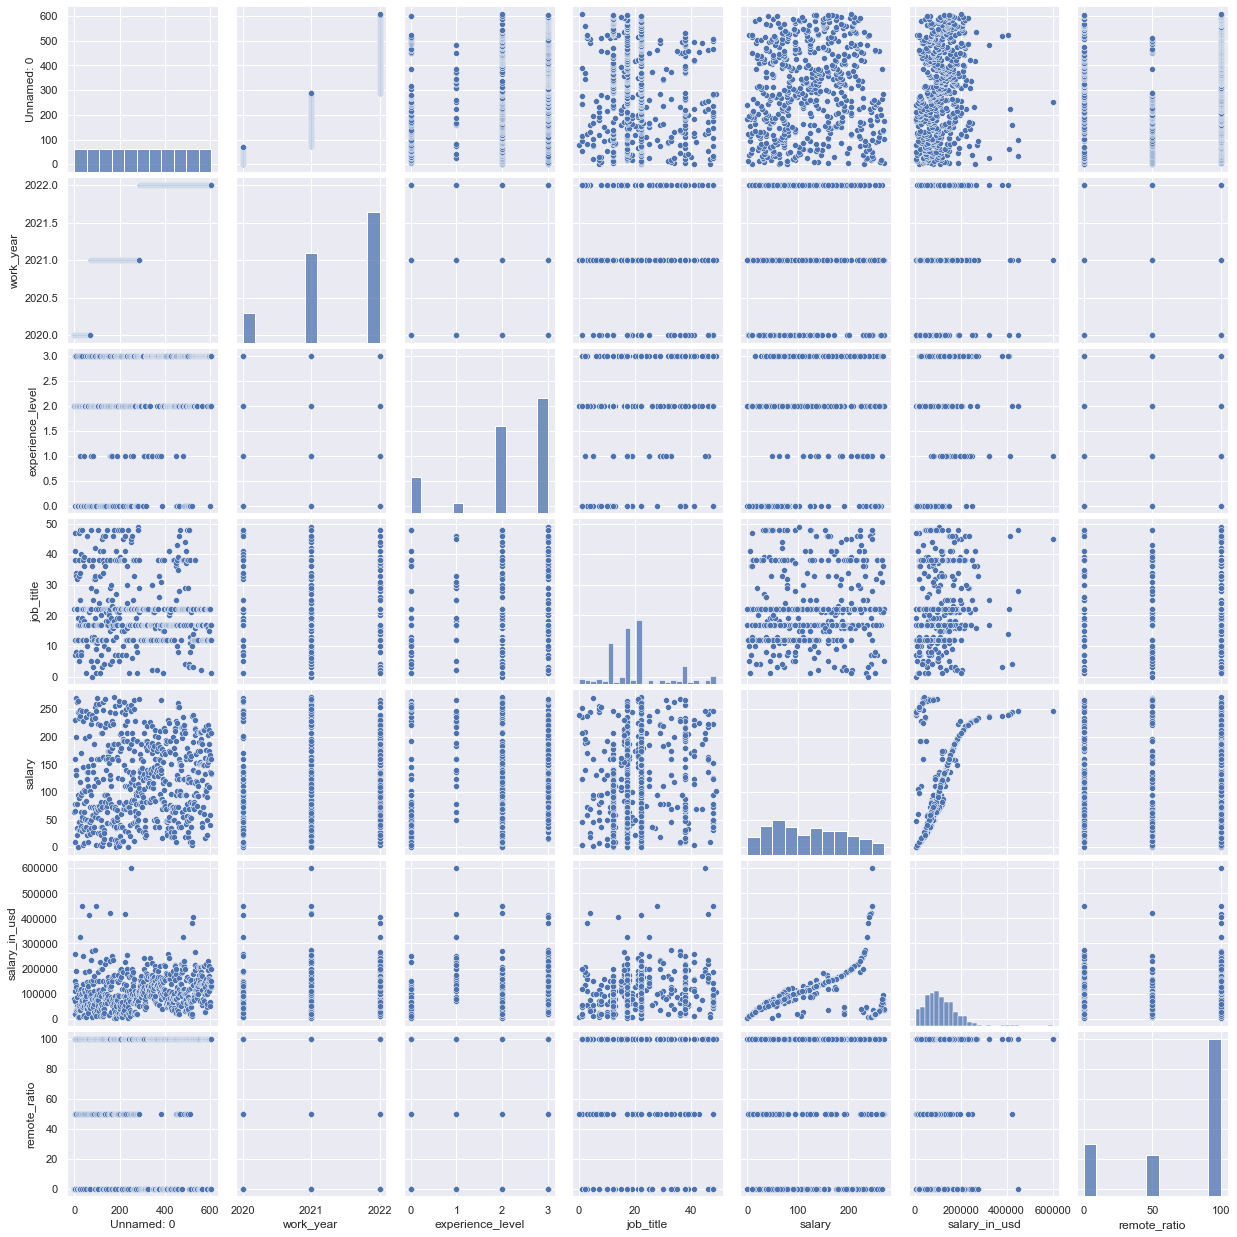

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
salaries_df_encoded = copy.deepcopy(salaries_df)
salaries_df_encoded.loc[:,['experience_level', 'job_title', 'salary']] = salaries_df_encoded.loc[:,['experience_level', 'job_title', 'salary']].apply(LabelEncoder().fit_transform) 
sns.pairplot(salaries_df_encoded)  #pairplot
plt.show()

when the experience level inc the salary inc too